## In this homework, we will use Credit Card Data from book "Econometric Analysis".
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

###### Load Dataset

In [1]:
# import pyhton library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# save url in the data variable
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

In [3]:
# download dataset 
!wget $data -O credit_card_data.csv

--2022-10-01 12:31:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘credit_card_data.csv’

credit_card_data.cs 100%[===================>]  71.53K   308KB/s    in 0.2s    

2022-10-01 12:31:10 (308 KB/s) - ‘credit_card_data.csv’ saved [73250/73250]



In [4]:
# load dataset
df = pd.read_csv('credit_card_data.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318
card,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,no,no,no,yes,no,yes,yes,yes
reports,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,5,0,0,0
age,37.66667,33.25,33.66667,30.5,32.16667,23.25,27.91667,29.16667,37.0,28.41667,...,40.16667,30.58333,39.33333,22.58333,30.33333,33.58333,23.91667,40.58333,32.83333,48.25
income,4.52,2.42,4.5,2.54,9.7867,2.5,3.96,2.37,3.8,3.2,...,2.0,2.512,2.3004,3.86,2.18,4.566,3.192,4.6,3.7,3.7
share,0.03327,0.005217,0.004156,0.065214,0.067051,0.044438,0.012576,0.076434,0.245628,0.01978,...,0.254827,0.002627,0.000522,0.000311,0.00055,0.002146,0.000376,0.026513,0.008999,0.111619
expenditure,124.9833,9.854167,15.0,137.8692,546.5033,91.99667,40.83333,150.79,777.8217,52.58,...,424.6292,4.583333,0.0,0.0,0.0,7.333333,0.0,101.2983,26.99667,344.1575
owner,yes,no,yes,no,yes,no,no,yes,yes,no,...,yes,no,no,no,no,yes,no,yes,no,yes
selfemp,no,no,no,no,no,no,no,no,no,no,...,no,yes,yes,no,yes,no,no,no,yes,no
dependents,3,3,4,0,2,0,2,0,0,0,...,1,3,0,1,0,0,3,2,0,2
months,54,34,58,25,64,54,7,77,97,65,...,121,36,46,36,13,94,12,1,60,2


In [5]:
# check for missing values
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

###### Preparation

In [6]:
# create the target variable by mapping yes to 1 and no to 0.
df.card = df.card.replace({'yes':1, 'no':0})

In [7]:
# import the train test split library
from sklearn.model_selection import train_test_split

In [8]:
# Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. 
# Use train_test_split funciton for that with random_state=1.

# slipt the dataset into 80%/20%
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)

# slipt the train dataset into 60%/20% for train and validation dataset
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

# reset the index of the sliptted dataset to true
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# assign the target values to the target variables
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

# delete the target variables from the train/validation/test datasets
del df_train['card']
del df_val['card']
del df_test['card']

###### Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the ```card``` variable.
 * Use the training dataset for that.
 * If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. ```-df_train['expenditure']```)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

 * reports
 * dependents
 * active
 * share

In [9]:
# split the train dataset into categorical variable
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)

# split the train dataset into numerical variable
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)

In [10]:
# import the metrics library for roc auc curve and score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [11]:
# for loop to compute AUC for the card variable
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    #If your AUC is < 0.5, invert this variable by putting "-" in front
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


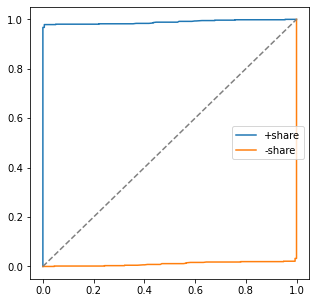

In [12]:
# We can also plot the ROC curve for share

plt.figure(figsize=(5, 5))

# assign values for false +ve rate and true +ve rate
fpr, tpr, _ = roc_curve(y_train, df_train.share)
# plot fpr, tpr for + share
plt.plot(fpr, tpr, label='+share')

# assign values for false +ve rate and true +ve rate
fpr, tpr, _ = roc_curve(y_train, -df_train.share)
# plot fpr, tpr for + share
plt.plot(fpr, tpr, label='-share')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

###### Training the model
From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

```LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)```

In [13]:
# import the feature extraction library to perform one-hot-encoding and logistic regression for training the model
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [14]:
# use the following columns 
columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

# convert the train dataset variable to dictionary
train_dicts = df_train[columns].to_dict(orient='records')

# assign the DictVectorizer to a variable
dv = DictVectorizer(sparse=False)

# fit the dataset for transformation
X_train = dv.fit_transform(train_dicts)

# assign the LogisticRegression to variable with the specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# fit the dataset training
model.fit(X_train, y_train)

# convert the val dataset variable to dictionary
val_dicts = df_val[columns].to_dict(orient='records')

# fit the dataset for transformation
X_val = dv.transform(val_dicts)

# make prediction
y_pred = model.predict_proba(X_val)[:, 1]

###### Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

In [15]:
roc_auc_score(y_val, y_pred).round(3)

0.995

###### Question 3
Now let's compute precision and recall for our model.
 * Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
 * For each threshold, compute precision and recall
 * Plot them
 
At which threshold precision and recall curves intersect?

In [16]:
# define a function for the confusion matrix
def confusion_matrix_dataframe(y_val, y_pred):
    
    # list for the computed results
    scores = []

    # np.linspace() return evenly spaced numbers over a specified interval.
    # set thresholds from 0.0 to 1.0 with step 0.01
    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        # where the actual +ve equals 1
        actual_positive = (y_val == 1)
        # where the actual -ve equals 0
        actual_negative = (y_val == 0)
        
        # where the predicted +ve value >= 1
        predict_positive = (y_pred >= t)
        # where the predicted -ve value < 1
        predict_negative = (y_pred < t)

        # where true +ve equals sum of predicted +ve & actual +ve
        tp = (predict_positive & actual_positive).sum()
        # where true -ve equals sum of predicted -ve & actual +ve
        tn = (predict_negative & actual_negative).sum()

        # where false +ve equals sum of predicted +ve & actual -ve
        fp = (predict_positive & actual_negative).sum()
        # where false -ve equals sum of predicted -ve & actual +ve
        fn = (predict_negative & actual_positive).sum()
        
        # add results from the loop in the scores variable
        scores.append((t, tp, fp, fn, tn))
    
    # create a of the outcome
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    # create a pandas DataFrame
    df_scores = pd.DataFrame(scores, columns=columns)
    
    # return the results
    return df_scores

In [17]:
# run the confusion matrix
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [18]:
# display the @ 10 per row
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [19]:
# compute for precision 
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)

# compute for recall 
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

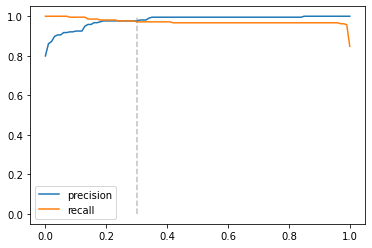

In [20]:
# plot for precision and recall in order to determine point of interaction
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

# intersection line
plt.vlines(0.3, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show();

###### Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F1 = {2.}\frac{P . R}{P+R}$$

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [21]:
# computing for the F1 scores
df_scores['f1'] = 2 * ((df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall']))

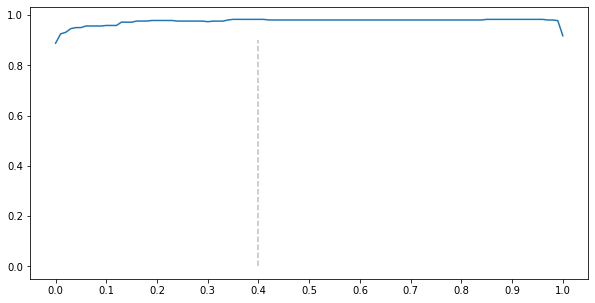

In [22]:
# plot where threshold F1 is maximal?
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(.4, 0, .9, color='grey', linestyle='--', alpha=0.5)


plt.xticks(np.linspace(0, 1, 11))
plt.show()

###### Question 5
Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [23]:
# import Kflod library
from sklearn.model_selection import KFold

In [24]:
# define function for tranforming and training the model of the train dataset
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')
    
    # assign the DictVectorizer to a variable
    dv = DictVectorizer(sparse=False)
    # fit to tranform the train dataset
    X_train = dv.fit_transform(dicts)
    
    # assign the LR function paramanet to a variable 
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    # fit to tran the dataset
    model.fit(X_train, y_train)

    return dv, model

# define function for tranforming and predicting the target vairable
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [26]:
# list for the results output
scores = []

# kflod parameters
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# loop and slipt the data full train to train and validation sets
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    # assign the test variable
    y_train = df_train.card.values
    y_val = df_val.card.values

    # tranform and fit the train dataset
    dv, model = train(df_train, y_train, C=1.0)
    
    # tranform and predict with the validation dataset
    y_pred = predict(df_val, dv, model)

    # compute the roc auc score
    auc = roc_auc_score(y_val, y_pred)
    # append results into the score variabl
    scores.append(auc)

# print the results of the mean and standard deviation
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


###### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [30]:
# looping through the C values
for C in [0.01, 0.1, 1, 10]:

    # list for the results output
    scores = []

    # kflod parameters
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    # loop and slipt the data full train to train and validation sets
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        # assign the test variable
        y_train = df_train.card.values
        y_val = df_val.card.values

        # tranform and fit the train dataset
        dv, model = train(df_train, y_train, C=C)

        # tranform and predict with the validation dataset
        y_pred = predict(df_val, dv, model)

        # compute the roc auc score
        auc = roc_auc_score(y_val, y_pred)
        # append results into the score variabl
        scores.append(auc)

    # print the results of the mean and standard deviation
    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.992 +- 0.006
C= 0.1, 0.995 +- 0.004
C=   1, 0.996 +- 0.003
C=  10, 0.996 +- 0.003
